<a href="https://colab.research.google.com/github/harshithgowdakc/Daily_Sales/blob/main/Daily_offers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Problem**

---
Build a machine learning model to predict the price of an item .

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

In [ ]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content.drive/')

Drive already mounted at /content.drive/; to attempt to forcibly remount, call drive.mount("/content.drive/", force_remount=True).


In [ ]:
#import the data from a csv file.
df = pd.read_excel('/content.drive/MyDrive/Colab Notebooks/AlmaBetter/CSV/daily_offers.xlsx')

# **Data Exploration**

---
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [ ]:
# Viewing the data of top 5 rows to look the glimps of the data
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
# Viewing the data of bottom 5 rows to look the glimps of the data
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.686538,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


**Feature details:**


*   **id:** A unique identifier for each item in the dataset.

*   **item_date:** The date associated with the item
*   **quantity tons:** The quantity of the item, measured in tons.
*   **customer:** The unique identifier for the customer who purchased the item.
*   **country:** The country associated with the customer who purchased the item.
*   **status:** The status of the item.
*   **item type:** The type of item.
*   **application:** The intended application of the item.
*   **thickness:** The thickness of the item, measured in millimeters.
*   **width:** The width of the item, measured in millimeters
*   **material_ref:** A reference code for the material used in the item.
*   **delivery date:** The date the item was delivered.
*   **selling_price:** The price at which the item was sold.

In [ ]:
#Getting the shape of dataset with rows and columns
df.shape

(181673, 14)

In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
#Looking for the description of the dataset to get insights of the data
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [ ]:
# Calculate the number of elements in the DataFrame
df.size

2543422

In [ ]:
#Check count of unique id's in the dataset
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(df.id.nunique()))

There are 181671 unique id's in Training dataset, which is equal to the number of records


In [ ]:
#Check for NaN values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# impute missing values in the DataFrame
df['material_ref'] = imputer.fit_transform(df[['material_ref']])

In [ ]:
# fill missing values with mode value
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['application'] = df['application'].fillna(df['application'].mode()[0])

In [ ]:
# fill missing values with mean value
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['quantity tons'] = df['quantity tons'].fillna(df['quantity tons'].mean())
df['thickness'] = df['thickness'].fillna(df['thickness'].mean())
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mean())

In [ ]:
# dropping all rows that have missing values column.
df.dropna(subset=['id'], inplace=True)
df.dropna(subset=['customer'], inplace = True)
df.dropna(subset=['item_date'], inplace = True)
df.dropna(subset=['delivery date'], inplace = True)

In [ ]:
#Check for NaN values
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

There is no NaN/NULL record in the dataset, So we dont have to impute any record.

In [ ]:
#Checking the shape of dataset with rows and columns
df.shape

(181668, 14)

There are approx 1.8 million records in our dataset.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


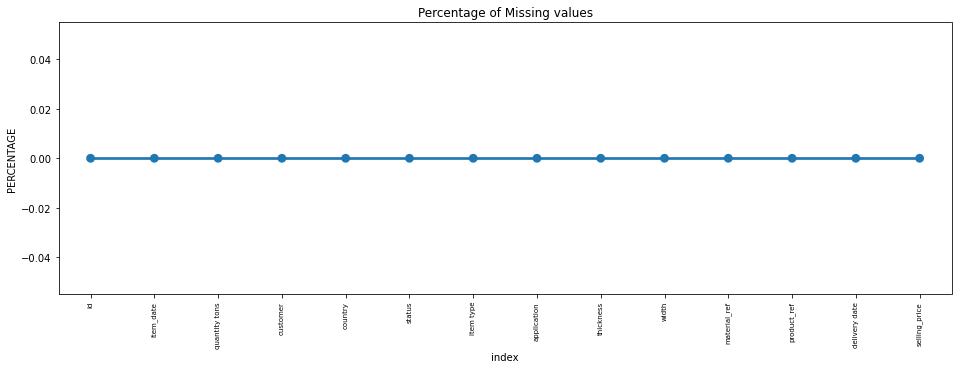

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0, data= missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
# Checking Duplicate Values
df.duplicated().sum()

0

In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [ ]:
df[['item_date', 'delivery date']]

,item_date,delivery date
0,1970-01-01 00:00:00.020210401,1970-01-01 00:00:00.020210701
1,1970-01-01 00:00:00.020210401,1970-01-01 00:00:00.020210401
2,1970-01-01 00:00:00.020210401,1970-01-01 00:00:00.020210101
3,1970-01-01 00:00:00.020210401,1970-01-01 00:00:00.020210101
4,1970-01-01 00:00:00.020210401,1970-01-01 00:00:00.020210301
...,...,...
181668,1970-01-01 00:00:00.020200702,1970-01-01 00:00:00.020200701
181669,1970-01-01 00:00:00.020200702,1970-01-01 00:00:00.020200701
181670,1970-01-01 00:00:00.020200702,1970-01-01 00:00:00.020200701
181671,1970-01-01 00:00:00.020200702,1970-01-01 00:00:00.020200701


In [ ]:
# Convert the date columns to datetime format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y-%m-%d %H:%M:%S.%f')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y-%m-%d %H:%M:%S.%f')

# Check for errors and drop any rows with invalid dates
df = df[df['delivery date'] > df['item_date']]

# Extract year, month, and day from the date columns
df['item_year'] = df['item_date'].dt.year
df['item_month'] = df['item_date'].dt.month
df['item_day'] = df['item_date'].dt.day

df['delivery_year'] = df['delivery date'].dt.year
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_day'] = df['delivery date'].dt.day

# Calculate the time difference between the item date and delivery date
df['time_diff'] = (df['delivery date'] - df['item_date']).dt.days

<ipython-input-24-32635f99fe4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_year'] = df['item_date'].dt.year
<ipython-input-24-32635f99fe4a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item_month'] = df['item_date'].dt.month
<ipython-input-24-32635f99fe4a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'item_year',
       'item_month', 'item_day', 'delivery_year', 'delivery_month',
       'delivery_day', 'time_diff'],
      dtype='object')

In [ ]:
df.shape

(165101, 21)

In [ ]:
z = 181673 - 165101
z

16572

In [ ]:
# calculate frequency of each category
freq = df['material_ref'].value_counts(normalize=True)

# replace each category with its frequency
df['material_ref_freq'] = df['material_ref'].map(freq)

# drop the original material_ref column
df.drop('material_ref', axis=1, inplace=True)

In [ ]:
#Dummify all the categorical features like status, item type and material_ref

dummy = pd.get_dummies(df.status , prefix = 'status')
dummy.drop(dummy.columns[0], axis = 1, inplace = True)
df = pd.concat([df,dummy], axis= 1)

dummy = pd.get_dummies(df['item type'] , prefix = 'item type')
dummy.drop(dummy.columns[0], axis= 1 , inplace =True)
df = pd.concat([df,dummy], axis =1 )


In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'delivery_year', 'delivery_month', 'delivery_day', 'time_diff',
       'material_ref_freq', 'status_Lost', 'status_Not lost for AM',
       'status_Offerable', 'status_Offered', 'status_Revised',
       'status_To be approved', 'status_Won', 'status_Wonderful',
       'item type_Others', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI'],
      dtype='object')

In [ ]:
df.dtypes

id                                object
item_date                 datetime64[ns]
quantity tons                    float64
customer                         float64
country                          float64
status                            object
item type                         object
application                      float64
thickness                        float64
width                            float64
product_ref                        int64
delivery date             datetime64[ns]
selling_price                    float64
item_year                          int64
item_month                         int64
item_day                           int64
delivery_year                      int64
delivery_month                     int64
delivery_day                       int64
time_diff                          int64
material_ref_freq                float64
status_Lost                        uint8
status_Not lost for AM             uint8
status_Offerable                   uint8
status_Offered  

In [ ]:
df.shape

(165101, 35)

Now our dataset is complete for the further analysis before we train our model with optimal variables.



# **Univariate Analysis**
---
Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable.

In [ ]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,...,status_Revised,status_To be approved,status_Won,status_Wonderful,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,...,0,0,1,0,0,0,0,0,1,0
6,E1B47219-42C8-411D-AE46-AD5256DC4757,1970-01-01 00:00:00.020210401,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,...,0,0,0,0,0,0,0,0,1,0


## **quantity tons**

In [ ]:
df['quantity tons'].nunique()

165101

In [ ]:
# Generate descriptive statistics for numerical variables
df['quantity tons'].describe()

count    1.651010e+05
mean     6.151086e+03
std      2.461077e+06
min     -4.000000e+00
25%      1.134838e+01
50%      3.052067e+01
75%      6.690152e+01
max      1.000000e+09
Name: quantity tons, dtype: float64

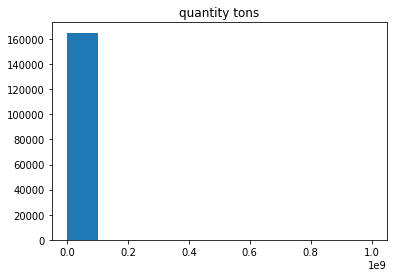

In [ ]:
plt.hist(df['quantity tons'])
plt.title('quantity tons')
plt.show()

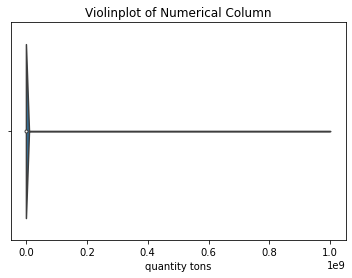

In [ ]:
# Violinplot
sns.violinplot(x='quantity tons', data=df)
plt.title('Violinplot of Numerical Column')
plt.show()

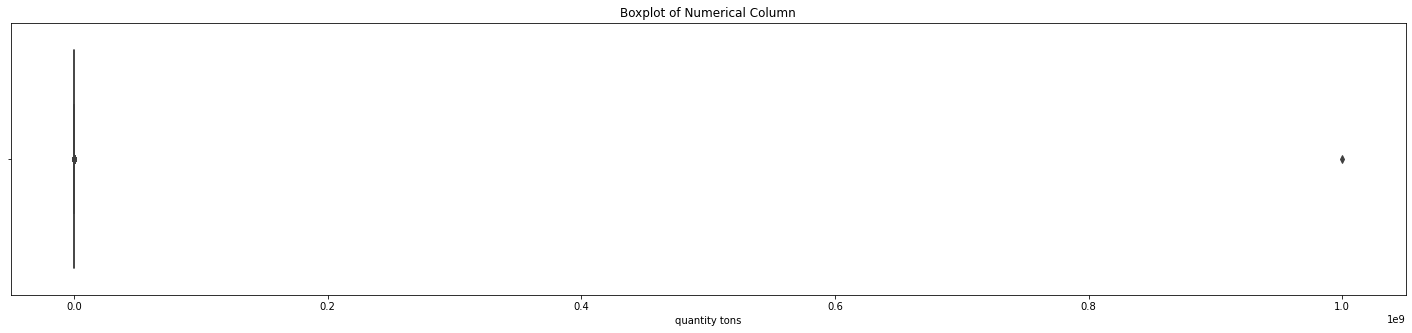

In [ ]:
# Boxplot
plt.figure(figsize = (25,5))
sns.boxplot(x='quantity tons', data=df)
plt.title('Boxplot of Numerical Column')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


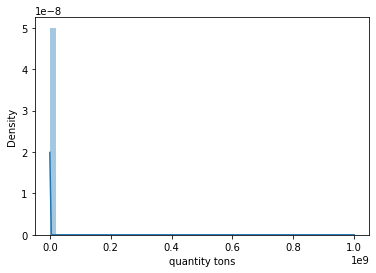

In [ ]:
# Displot
sns.distplot(df['quantity tons'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


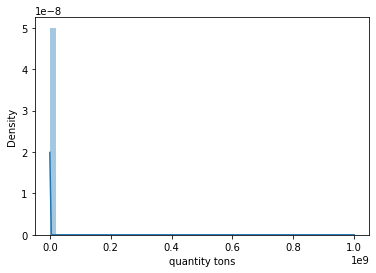

In [ ]:
# Displot
sns.distplot(df['quantity tons'])
plt.show()

In [ ]:
# Get the 10 largest quantities
df['quantity tons'].nlargest(10)

173022    1.000000e+09
100260    7.025236e+04
100256    4.775849e+04
100248    2.952815e+04
71486     2.400032e+04
71498     2.072437e+04
2834      2.030029e+04
2758      1.900722e+04
85526     1.900683e+04
2725      1.900212e+04
Name: quantity tons, dtype: float64

Observations:

Few quantity tons are way more  Clear outliers and pointers to data inconsistency
Most of trip consist of passenger either 1 or 2

In [ ]:
# Assuming your DataFrame is called 'df'
df = df[df['quantity tons'] != 1.0e+09].reset_index(drop=True)

In [ ]:
#check rows and columns
df.shape

(165100, 35)

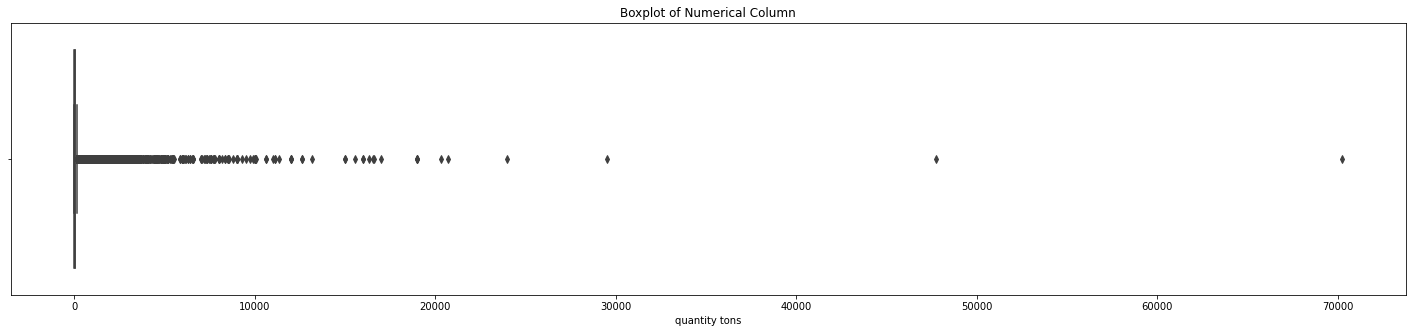

In [ ]:
# Boxplot
plt.figure(figsize = (25,5))
sns.boxplot(x='quantity tons', data=df)
plt.title('Boxplot of Numerical Column')
plt.show()

## customer

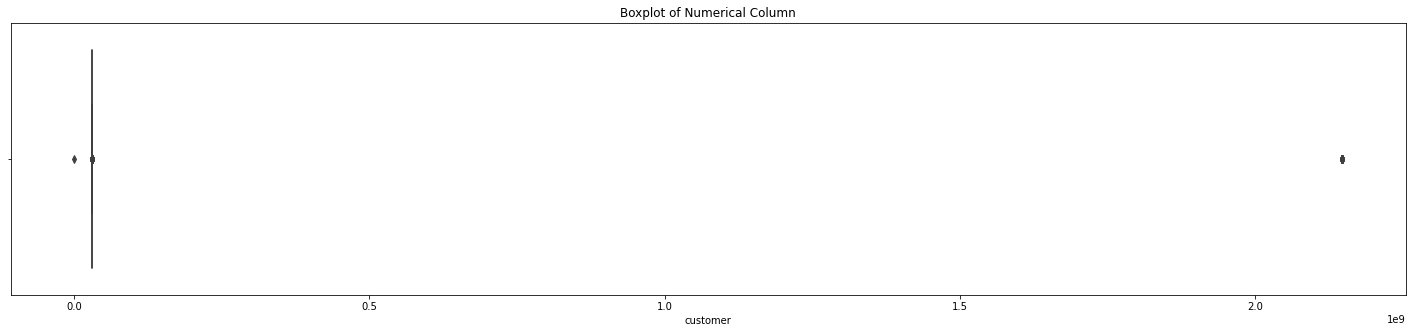

In [ ]:
# Boxplot
plt.figure(figsize = (25,5))
sns.boxplot(x='customer', data=df)
plt.title('Boxplot of Numerical Column')
plt.show()

In [ ]:
df.shape

(165100, 35)

In [ ]:
df['customer'].describe()

count    1.651000e+05
mean     3.054113e+07
std      2.552569e+07
min      1.245800e+04
25%      3.019689e+07
50%      3.020531e+07
75%      3.028096e+07
max      2.147484e+09
Name: customer, dtype: float64

In [ ]:
# Define the edges of the bins for the categorical variable
bins = [0, 3.019689e+07, 3.020531e+07, 2.147484e+09]

# Define the labels for the categorical variable
labels = ['Low', 'Medium', 'High']

# Create the categorical variable based on the 'customer' column
df['customer_cat'] = pd.cut(df['customer'], bins=bins, labels=labels)

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'delivery_year', 'delivery_month', 'delivery_day', 'time_diff',
       'material_ref_freq', 'status_Lost', 'status_Not lost for AM',
       'status_Offerable', 'status_Offered', 'status_Revised',
       'status_To be approved', 'status_Won', 'status_Wonderful',
       'item type_Others', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI', 'customer_cat'],
      dtype='object')

In [ ]:
df['customer_cat'].value_counts()

High      83935
Low       41461
Medium    39704
Name: customer_cat, dtype: int64

In [ ]:
#Dummify all the categorical features like customer_cat
dummies = pd.get_dummies(df['customer_cat'], prefix='customer_cat', drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'delivery_year', 'delivery_month', 'delivery_day', 'time_diff',
       'material_ref_freq', 'status_Lost', 'status_Not lost for AM',
       'status_Offerable', 'status_Offered', 'status_Revised',
       'status_To be approved', 'status_Won', 'status_Wonderful',
       'item type_Others', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI', 'customer_cat', 'customer_cat_Medium',
       'customer_cat_High'],
      dtype='object')

In [ ]:
df[['customer_cat','customer_cat_Medium','customer_cat_High']]

,customer_cat,customer_cat_Medium,customer_cat_High
0,Low,0,0
1,High,0,1
2,High,0,1
3,High,0,1
4,Low,0,0
...,...,...,...
165095,High,0,1
165096,Low,0,0
165097,Low,0,0
165098,Low,0,0


In [ ]:
df['customer_cat'].dtypes

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True)

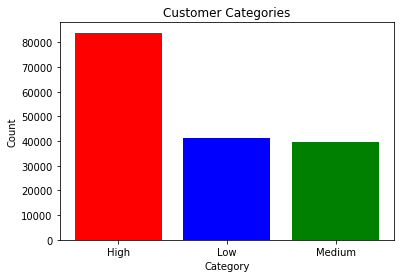

In [ ]:
# create a frequency table of the categorical variable
freq_table = df['customer_cat'].value_counts()

# create a bar chart of the frequency table
plt.bar(freq_table.index, freq_table.values,  color=['red', 'blue', 'green'])

# set the chart title and axis labels
plt.title('Customer Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# show the chart
plt.show()

## country

In [ ]:
df['country'].value_counts()

78.0     30103
26.0     24943
27.0     20562
25.0     19868
32.0     16914
28.0     14791
84.0     11555
77.0      9026
30.0      6111
39.0      3712
79.0      2559
38.0      1711
40.0      1633
80.0       817
113.0      712
89.0        81
107.0        2
Name: country, dtype: int64

In [ ]:
df['country'].dtypes

dtype('float64')

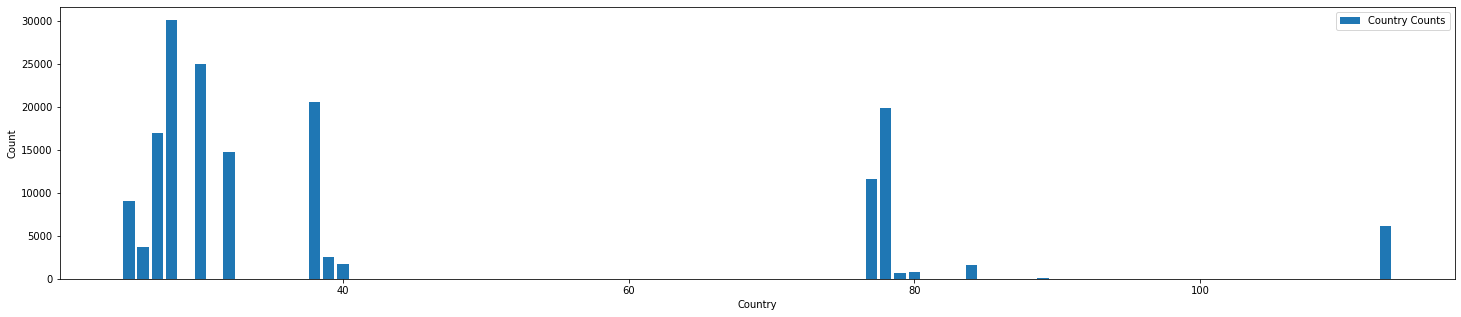

In [ ]:
plt.figure(figsize = (25,5))
plt.bar(x=df['country'].unique(), height=df['country'].value_counts())
plt.xlabel('Country')
plt.ylabel('Count')
# add the legend
plt.legend(['Country Counts'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


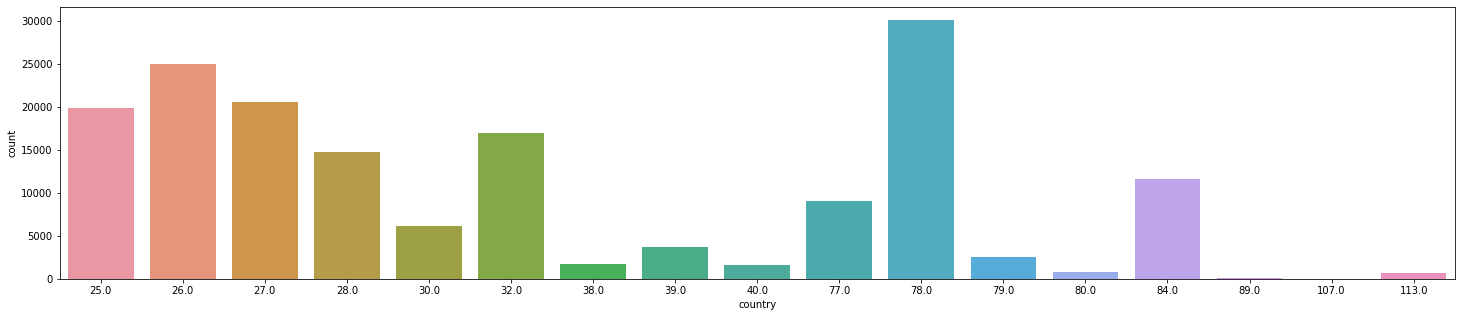

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(df.country)
plt.show()

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_year', 'item_month', 'item_day',
       'delivery_year', 'delivery_month', 'delivery_day', 'time_diff',
       'material_ref_freq', 'status_Lost', 'status_Not lost for AM',
       'status_Offerable', 'status_Offered', 'status_Revised',
       'status_To be approved', 'status_Won', 'status_Wonderful',
       'item type_Others', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI', 'customer_cat', 'customer_cat_Medium',
       'customer_cat_High'],
      dtype='object')

## **status**

In [ ]:
df['status'].value_counts()

Won                101585
Lost                33786
Not lost for AM     18826
To be approved       4066
Revised              4032
Draft                2742
Offered                53
Offerable               9
Wonderful               1
Name: status, dtype: int64

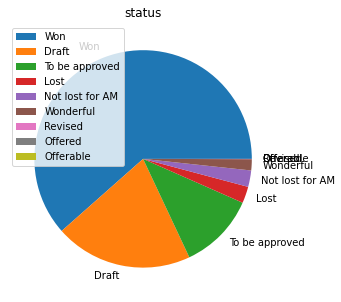

In [ ]:
# create a pie chart
plt.figure(figsize=(20,5))
plt.pie(df['status'].value_counts(), labels=df['status'].unique())

# set the title
plt.title("status")
# add the legend
plt.legend()

# show the plot
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

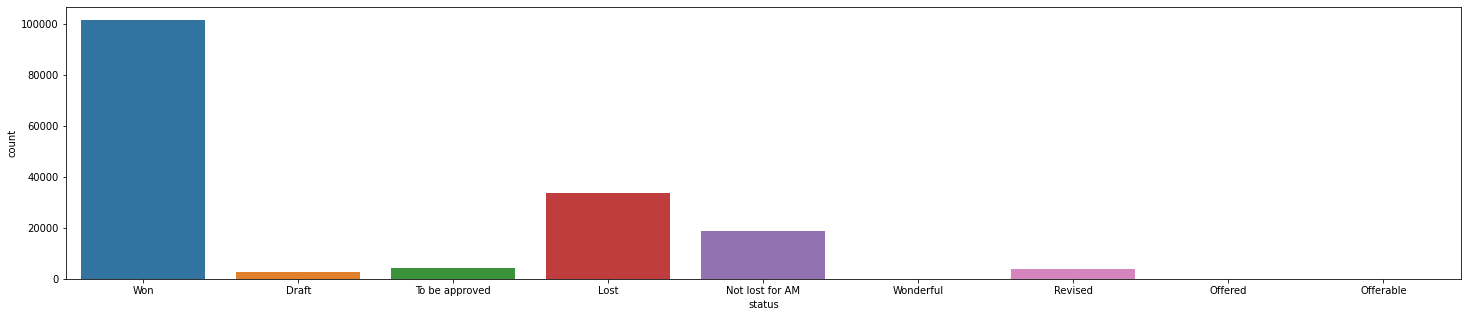

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(df['status'])
plt.show

### **item type**

In [ ]:
df['item type'].value_counts()

W         94734
S         64692
PL         4816
Others      416
WI          414
IPL          27
SLAWR         1
Name: item type, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

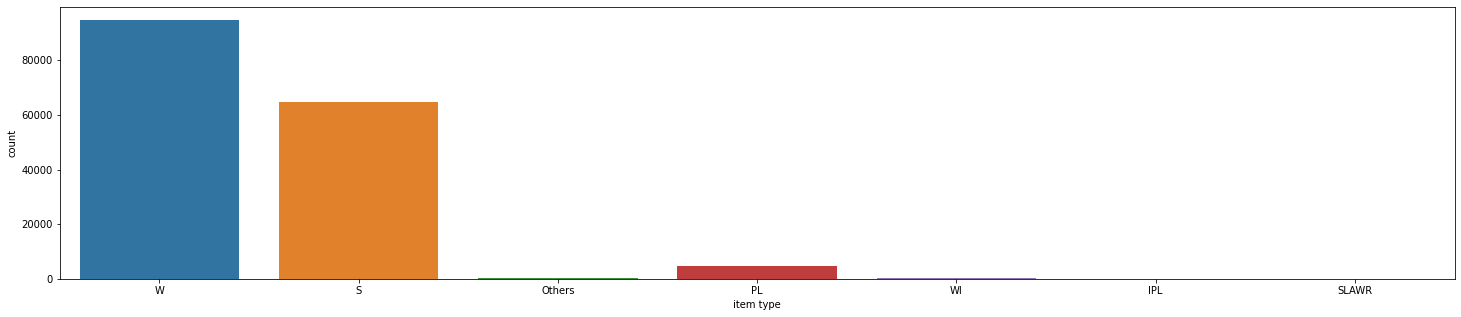

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(df['item type'])
plt.show

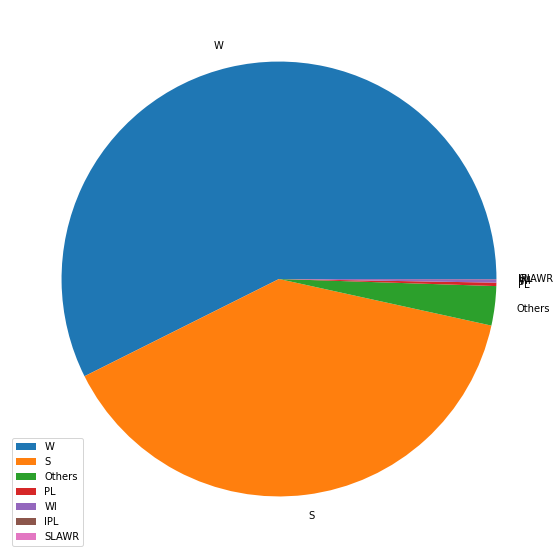

In [ ]:
plt.figure(figsize = (50,10))
plt.pie(df['item type'].value_counts(), labels=df['item type'].unique())
# add the legend
plt.legend()
plt.show()

## **application**

In [ ]:
df['application'].nunique()

30

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


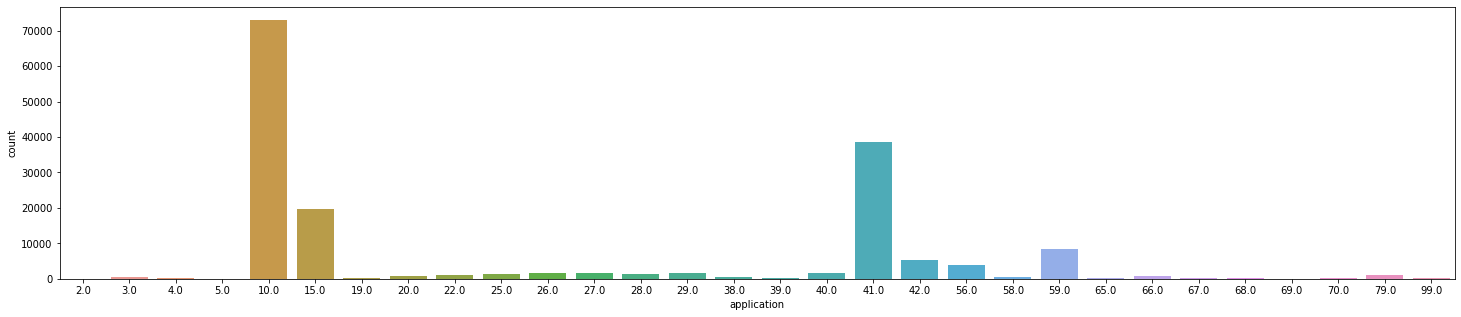

In [ ]:
plt.figure(figsize = (25,5))
sns.countplot(df.application)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


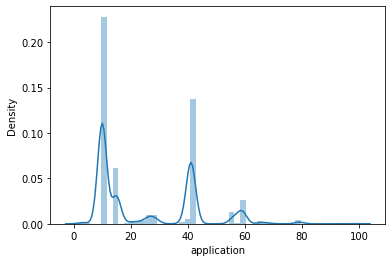

In [ ]:
sns.distplot(df['application'])
plt.show()

## **thickness**

In [ ]:
df['thickness'].nunique()

587

In [ ]:
df['thickness'].describe()

count    165100.000000
mean          2.607858
std           3.021920
min           0.180000
25%           0.740000
50%           1.500000
75%           3.000000
max         400.000000
Name: thickness, dtype: float64

In [ ]:
df['thickness'].nlargest()

43877     400.0
40717      25.4
97202      25.4
136888     25.4
40723      25.0
Name: thickness, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thickness'>

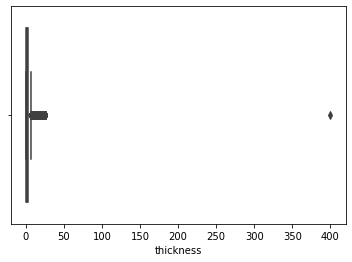

In [ ]:
sns.boxplot(df['thickness'])

In [ ]:
df = df[df['thickness'] < 100]

In [ ]:
df.shape

(165099, 38)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thickness'>

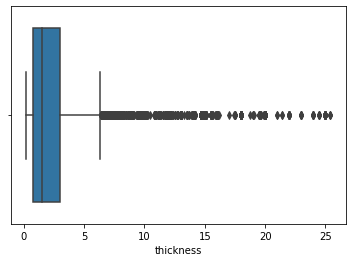

In [ ]:
sns.boxplot(df['thickness'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thickness', ylabel='Density'>

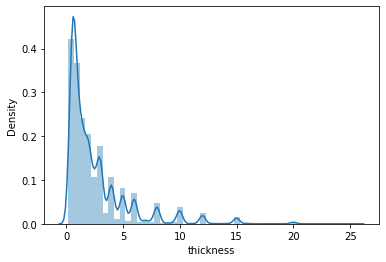

In [ ]:
sns.distplot(df['thickness'])

## **width**

In [ ]:
df['width'].nunique()

1372

In [ ]:
df['width'].describe()

count    165099.000000
mean       1300.945423
std         262.070468
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width'>

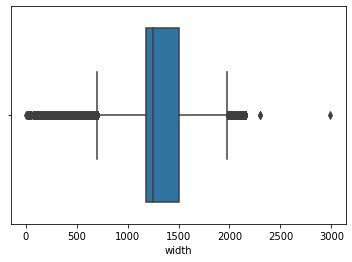

In [ ]:
sns.boxplot(df['width'])

In [ ]:
df['width'].nsmallest(10)

484       1.0
45862    20.5
45866    20.5
45870    20.5
72420    20.5
72432    20.5
72440    20.5
72448    20.5
80802    20.5
80810    20.5
Name: width, dtype: float64

In [ ]:
df= df[df['width'] > 20]

In [ ]:
df['width'].nsmallest(10)

45862    20.5
45866    20.5
45870    20.5
72420    20.5
72432    20.5
72440    20.5
72448    20.5
80802    20.5
80810    20.5
80818    20.5
Name: width, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width'>

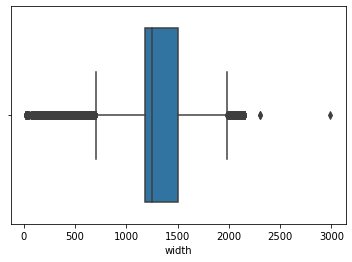

In [ ]:
sns.boxplot(df['width'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='width', ylabel='Density'>

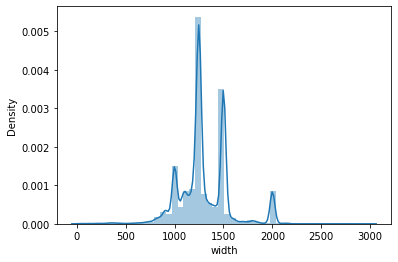

In [ ]:
sns.distplot(df['width'])

## **selling_price**

In [ ]:
df['selling_price'].nunique()

7606

In [ ]:
df['selling_price'].describe()

count    1.650980e+05
mean     1.429287e+03
std      2.461105e+05
min     -7.300000e+02
25%      6.770000e+02
50%      8.174550e+02
75%      9.580000e+02
max      1.000010e+08
Name: selling_price, dtype: float64

it seems like there are negative values in the 'selling_price' column which is not possible. To clean the data, you can drop the rows where the 'selling_price' is less than or equal to zero

In [ ]:
df.shape

(165098, 38)

In [ ]:
df = df[df['selling_price'] > 0]

In [ ]:
df.shape

(165093, 38)

In [ ]:
df = df[df['selling_price'] < 3000.0 ]

In [ ]:
df = df[df['selling_price'] > 9.0 ]

In [ ]:
df.shape

(165085, 38)

In [ ]:
df['selling_price'].nsmallest(3)

101811    10.0
904       11.0
1716      11.0
Name: selling_price, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

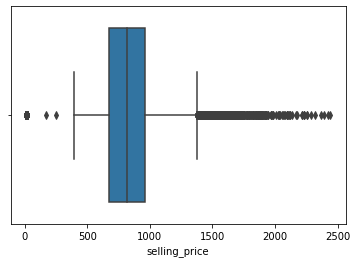

In [ ]:
sns.boxplot(df['selling_price'])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

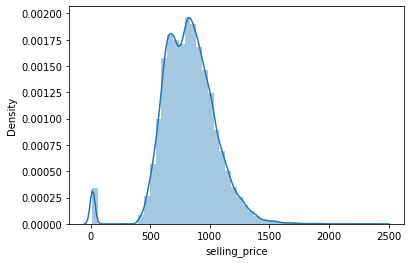

In [ ]:
sns.distplot(df['selling_price'])

# **Bivariate Analysis**

Bivariate analysis is used to find out if there is a relationship between two sets of values. It usually involves the variables X and Y.

## **selling_price vs quantity tons**

In [ ]:
df[['quantity tons','selling_price']]

,quantity tons,selling_price
0,54.151139,854.0
1,3.522613,18.0
2,69.071853,1363.0
3,9.175770,17.0
4,27.512545,1098.0
...,...,...
165095,32.216122,552.0
165096,66.431473,458.0
165097,63.859521,457.0
165098,56.028562,458.0


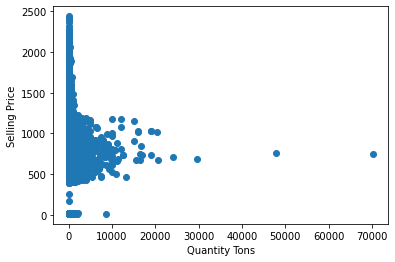

In [ ]:
# create scatter plot
plt.scatter(x=df['quantity tons'], y=df['selling_price'])

# set labels
plt.xlabel('Quantity Tons')
plt.ylabel('Selling Price')

# show plot
plt.show()

In [ ]:
df.shape

(165085, 38)

In [ ]:
from scipy.stats import zscore

# Calculate the Z-scores for the quantity tons and selling_price columns
z_scores = zscore(df[['quantity tons', 'selling_price']])

# Create a boolean mask to identify rows with Z-scores greater than 3
outliers = (abs(z_scores) > 3).any(axis=1)

# Filter out the rows with outliers
cleaned_df = df[~outliers]

In [ ]:
cleaned_df.shape

(160376, 38)

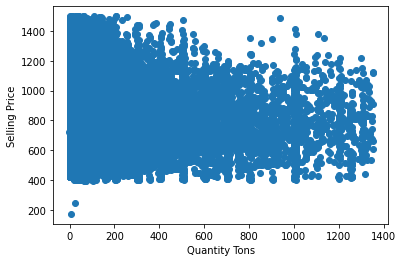

In [ ]:
# create scatter plot
plt.scatter(x=cleaned_df['quantity tons'], y=cleaned_df['selling_price'])

# set labels
plt.xlabel('Quantity Tons')
plt.ylabel('Selling Price')

# show plot
plt.show()

## **thickness vs width**

In [ ]:
df[['thickness','width']]

,thickness,width
0,2.00,1500.0
1,0.38,1125.0
2,0.60,1275.0
3,0.38,1125.0
4,0.75,1250.0
...,...,...
165095,6.00,2000.0
165096,3.85,1525.0
165097,5.85,1525.0
165098,7.85,1500.0


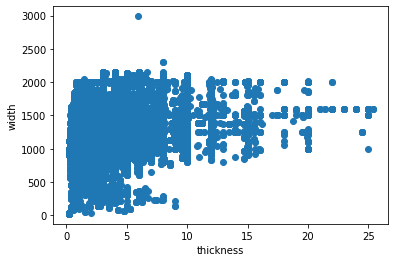

In [ ]:
# create scatter plot
plt.scatter(x=df['thickness'], y=df['width'])

# set labels
plt.xlabel('thickness')
plt.ylabel('width')

# show plot
plt.show()

## **status vs quantity tons**


In [ ]:
df[['status','quantity tons']]

,status,quantity tons
0,Won,54.151139
1,Draft,3.522613
2,Won,69.071853
3,Draft,9.175770
4,Won,27.512545
...,...,...
165095,Lost,32.216122
165096,Lost,66.431473
165097,Lost,63.859521
165098,Lost,56.028562


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


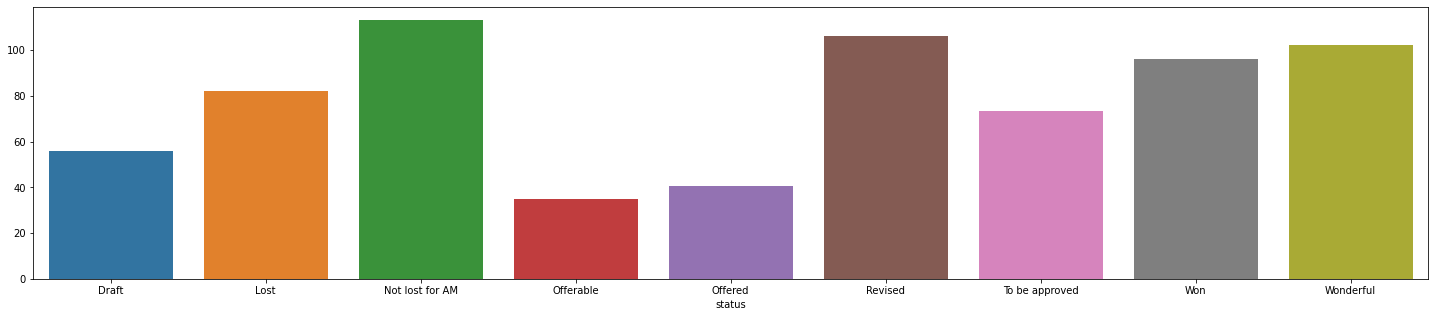

In [ ]:
plt.figure(figsize = (25,5))
group1 = df.groupby('status')['quantity tons'].mean()
sns.barplot(group1.index, group1.values)
plt.show()

## **item type	vs quantity tons**

In [ ]:
df[['item type','quantity tons']]

,item type,quantity tons
0,W,54.151139
1,W,3.522613
2,S,69.071853
3,W,9.175770
4,W,27.512545
...,...,...
165095,S,32.216122
165096,S,66.431473
165097,S,63.859521
165098,S,56.028562


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


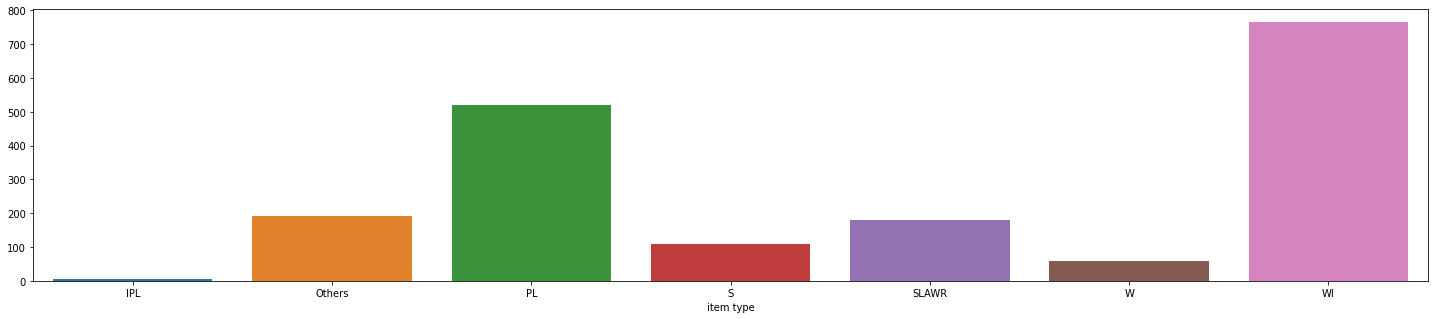

In [ ]:
plt.figure(figsize = (25,5))
group2 = df.groupby('item type')['quantity tons'].mean()
sns.barplot(group2.index, group2.values)
plt.show()

## **application vs item type**

In [ ]:
df[['item type','application']]

,item type,application
0,W,10.0
1,W,41.0
2,S,10.0
3,W,41.0
4,W,10.0
...,...,...
165095,S,15.0
165096,S,10.0
165097,S,10.0
165098,S,10.0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


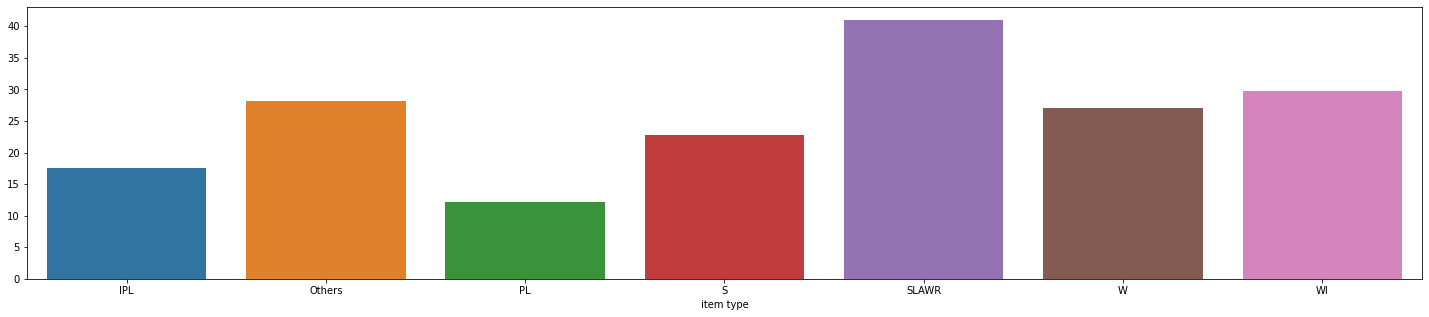

In [ ]:
plt.figure(figsize = (25,5))
group3 = df.groupby('item type')['application'].mean()
sns.barplot(group3.index, group3.values)
plt.show()

## **application vs status**

In [ ]:
df[['status','application']]

,status,application
0,Won,10.0
1,Draft,41.0
2,Won,10.0
3,Draft,41.0
4,Won,10.0
...,...,...
165095,Lost,15.0
165096,Lost,10.0
165097,Lost,10.0
165098,Lost,10.0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


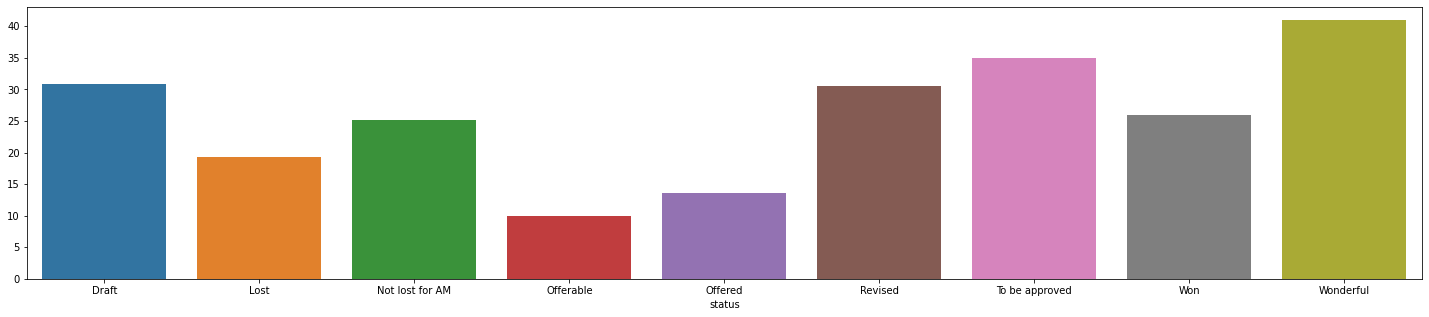

In [ ]:
plt.figure(figsize = (25,5))
group4 = df.groupby('status')['application'].mean()
sns.barplot(group4.index, group4.values)
plt.show()

# **Feature Engineering**

---
After looking at the dataset from different perspectives. Let's prepare our dataset before training our model. Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.


## **Feature Selection**

**Intuition**

*   We will use backward elimination technique to select the best features to train our model.
*   It displays some statistical metrics with there significance value.
*   Like, It shows the p values for each feature as per its significance in the whole dataset.
*   It also shows the adjusted R squared values to identify whether removing or selecting the feature is beneficial or not.
*   For now we will only look at the P and adjusted R squared value to decide which features to keep and which needed to be removed.

Let's assign the values to X & Y array from the dataset.

In [ ]:
#First chech the index of the features and label
list(zip( range(0,len(df.columns)),df.columns))

[(0, 'id'),
 (1, 'item_date'),
 (2, 'quantity tons'),
 (3, 'customer'),
 (4, 'country'),
 (5, 'status'),
 (6, 'item type'),
 (7, 'application'),
 (8, 'thickness'),
 (9, 'width'),
 (10, 'product_ref'),
 (11, 'delivery date'),
 (12, 'selling_price'),
 (13, 'item_year'),
 (14, 'item_month'),
 (15, 'item_day'),
 (16, 'delivery_year'),
 (17, 'delivery_month'),
 (18, 'delivery_day'),
 (19, 'time_diff'),
 (20, 'material_ref_freq'),
 (21, 'status_Lost'),
 (22, 'status_Not lost for AM'),
 (23, 'status_Offerable'),
 (24, 'status_Offered'),
 (25, 'status_Revised'),
 (26, 'status_To be approved'),
 (27, 'status_Won'),
 (28, 'status_Wonderful'),
 (29, 'item type_Others'),
 (30, 'item type_PL'),
 (31, 'item type_S'),
 (32, 'item type_SLAWR'),
 (33, 'item type_W'),
 (34, 'item type_WI'),
 (35, 'customer_cat'),
 (36, 'customer_cat_Medium'),
 (37, 'customer_cat_High')]

In [ ]:
# Select the features and target variable
X = df[['quantity tons', 'country', 'item type', 'application', 'thickness', 'width',
        'product_ref', 'time_diff', 'material_ref_freq', 'status_Lost', 'status_Not lost for AM',
        'status_Offerable', 'status_Offered', 'status_Revised', 'status_To be approved', 'status_Won',
        'status_Wonderful', 'item type_Others', 'item type_PL', 'item type_S', 'item type_SLAWR',
        'item type_W', 'item type_WI', 'customer_cat_Medium', 'customer_cat_High']]
y = df['selling_price']

In [ ]:
X = df.iloc[:, [2,4,7,8,9,10,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37]].values
y = df.iloc[:, 12].values

**Note**:

 that I excluded the columns with the names 'id', 'item_date', 'customer', 'delivery date', 'item_year', 'item_month', 'item_day', 'delivery_year', and 'delivery_month' as they do not seem to provide relevant information for predicting the target variable 'selling_price'. Also, the 'customer_cat' column is categorical, so we need to select its encoded versions ('customer_cat_Medium' and 'customer_cat_High') instead.

In [ ]:
X.shape

(165085, 24)

In [ ]:
y.shape

(165085,)

In [ ]:
y.shape

(165085,)

In [ ]:
print("Let's append {} rows of 1's as the first column in the X array".format(X.shape[0]))

Let's append 165085 rows of 1's as the first column in the X array


In [ ]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)

In [ ]:
X1.shape

(165085, 25)

There we go, our feature set is now ready for the feature selection model with 1s in the first column for a0 constant.

Let's fit stats model on the X array to figure out an optimal set of features by recursively checking for the highest p value and removing the feature of that index.

**Note:**

Here we will take the level of significance as 0.05 i.e. 5% which means that we will reject feature from the list of array and re-run the model till p value for all the features goes below .05 to find out the optimal combination for our model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [ ]:
import statsmodels.api as sm

In [ ]:
#Select all the features in X array
X_opt = X1[:,range(0,25)]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Probability values of each feature 

[3.22339787e-003 3.78262918e-017 6.39203494e-139 0.00000000e+000
 0.00000000e+000 3.66989893e-176 7.28551530e-105 7.05067833e-081
 5.02679984e-162 0.00000000e+000 0.00000000e+000 3.47295139e-056
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.10032760e-009 8.49848642e-001 2.51972079e-001 5.82263149e-001
 1.65354595e-001 7.85889324e-001 2.86593846e-005 2.27778737e-032
 1.41909900e-038]


Feature at index 17 is removed 

23 dimensions remaining now... 


Probability values of each feature 

[6.80036462e-024 3.74722337e-017 6.19811219e-139 0.00000000e+000
 0.00000000e+000 3.53857236e-176 7.40553973e-105 1.94459629e-019
 5.05458958e-162 0.00000000e+000 0.00000000e+000 3.47019055e-056
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.10015759e-009 1.90430386e-004 1.39856665e-001 1.48053411e-001
 6.64476455e-002 3.37868134e-031 2.22835693e-032 1.41694481e-038]


Feature at index 19 is removed 

22 dimensions remaining

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     4202.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:50:20   Log-Likelihood:            -1.0945e+06
No. Observations:              165085   AIC:                         2.189e+06
Df Residuals:                  165064   BIC:                         2.189e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.6938      4.633     18.497      0.000      76.613      94.774
x1            -0.0092      0.001     -8.408      0.000      -0.011      -0.007
x2            -0.5095      0.020    -25.180      0.000      -0.549      -0.470
x3             1.0434      0.027     38.209      0.000       0.990       1.097
x4           -20.4160      0.174   -117.174      0.000     -20.757     -20.074
x5            -0.0541      0.002    -28.344      0.000      -0.058      -0.050
x6         -1.417e-08   6.51e-10    -21.772      0.000   -1.54e-08   -1.29e-08
x7            58.4158      2.154     27.119      0.000      54.194      62.638
x8           847.1936      3.686    229.836      0.000     839.969     854.418
x9           863.7220      3.769    229.153      0.000     856.334     871.110
x10          966.7475     61.194     15.798      0.000     846.808    1086.687
x11         1001.2036     25.426     39.378      0.000     951.370    1051.038
x12          858.2433      4.555    188.406      0.000     849.315     867.172
x13          909.7565      4.534    200.655      0.000     900.870     918.643
x14          844.6161      3.562    237.091      0.000     837.634     851.598
x15         1116.8797    183.283      6.094      0.000     757.650    1476.110
x16          -21.2710      2.871     -7.409      0.000     -26.898     -15.644
x17           28.8806      1.012     28.541      0.000      26.897      30.864
x18         -133.1769      9.101    -14.633      0.000    -151.015    -115.339
x19          -16.9296      1.426    -11.871      0.000     -19.725     -14.134
x20           14.9158      1.148     12.990      0.000      12.665      17.166
==============================================================================
Omnibus:                     9125.385   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12666.783
Skew:                           0.511   Prob(JB):                         0.00
Kurtosis:                       3.892   Cond. No.                     3.52e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations**

Finally we have reached the combination of optimum features with each feature having p value < 0.05.

**Split Data**

Before training our model on the dataset, we need to split the dataset into training and testing datasets. This is required to train our model on the major part of our dataset and test the accuracy of the model on the minor part. Let's split it

In [ ]:
#Split raw data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=0.1)

#Split data from the feature selection group
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,y, random_state=4, test_size=0.1)

This will divide our dataset randomly with a ratio of 90/10.Let's train our model on the training set now.

## **Feature Extraction**

We will use PCA for feature extraction i.e. Principal Component Analysis. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components


---
**Split Data**
Lets split our data first before scaling the features

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,y, random_state=4, test_size=0.1)

**Scale Data**

It is suggested to scale the input varibles first before applying PCA to standardise the variance and avoid the bias. Lets Scale the data using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

**PCA application**

Let's apply PCA technique on the training features to understand how many principal components should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

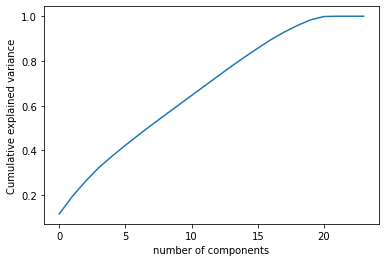

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [ ]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 11.63),
 (2, 19.55),
 (3, 26.34),
 (4, 32.42),
 (5, 37.510000000000005),
 (6, 42.35000000000001),
 (7, 46.98000000000001),
 (8, 51.500000000000014),
 (9, 55.890000000000015),
 (10, 60.250000000000014),
 (11, 64.60000000000001),
 (12, 68.95),
 (13, 73.28),
 (14, 77.6),
 (15, 81.72999999999999),
 (16, 85.72999999999999),
 (17, 89.55999999999999),
 (18, 92.93999999999998),
 (19, 95.89999999999998),
 (20, 98.41999999999997),
 (21, 99.88999999999997),
 (22, 100.01999999999997),
 (23, 100.01999999999997)]

**Observation**

*   Here we can see that almost 21 variables are needed for capturing atleast 99% of the variance in the training dataset. Hence we will use the same set of variables.

In [ ]:
pca_10 = PCA(n_components=22)
X_train_pca = pca_10.fit_transform(X_train_pca)
X_test_pca = pca_10.transform(X_test_pca)

PCA is applied on the training and the test dataset. Our input features are now ready for the regression.

# **Correlation Analysis**

---
Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

**Heatmap**

---
A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.


<AxesSubplot:>

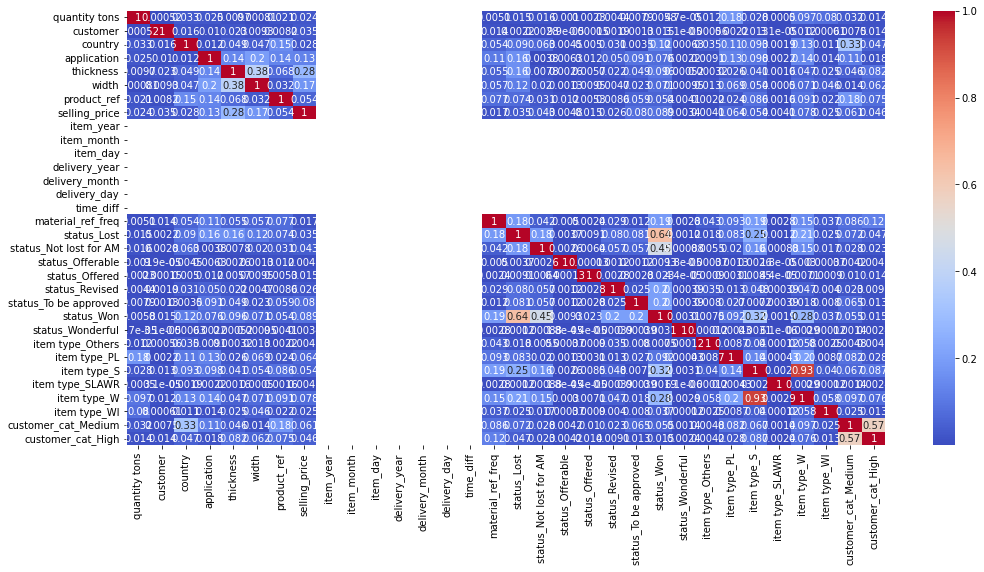

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Let's plot the relationship between the features of the Feature selection group 

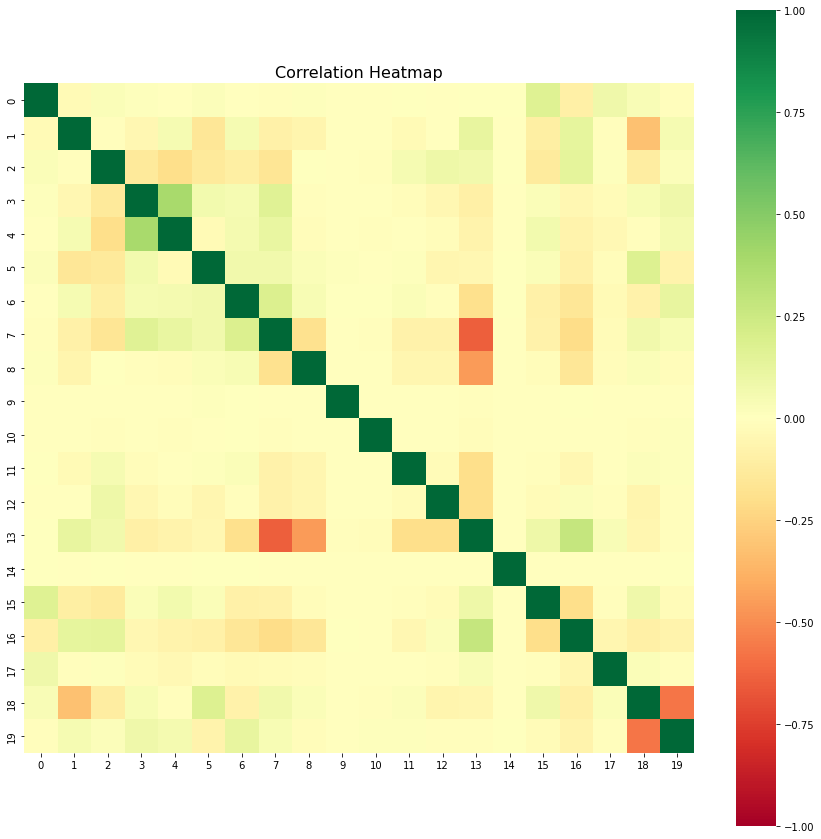

In [ ]:
plt.figure(figsize=(15,15))
corr = pd.DataFrame(X_train_fs[:,1:]).corr()
corr.index = pd.DataFrame(X_train_fs[:,1:]).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Observations**


*   Some combinations of features shows slight correlation but not above 0.5.

*   Some features are infact negatively correlated.

*   But most of the features shows no correlation. Which is a good thing.


---

Let's now plot the relationship between the features of the Feature extraction group.


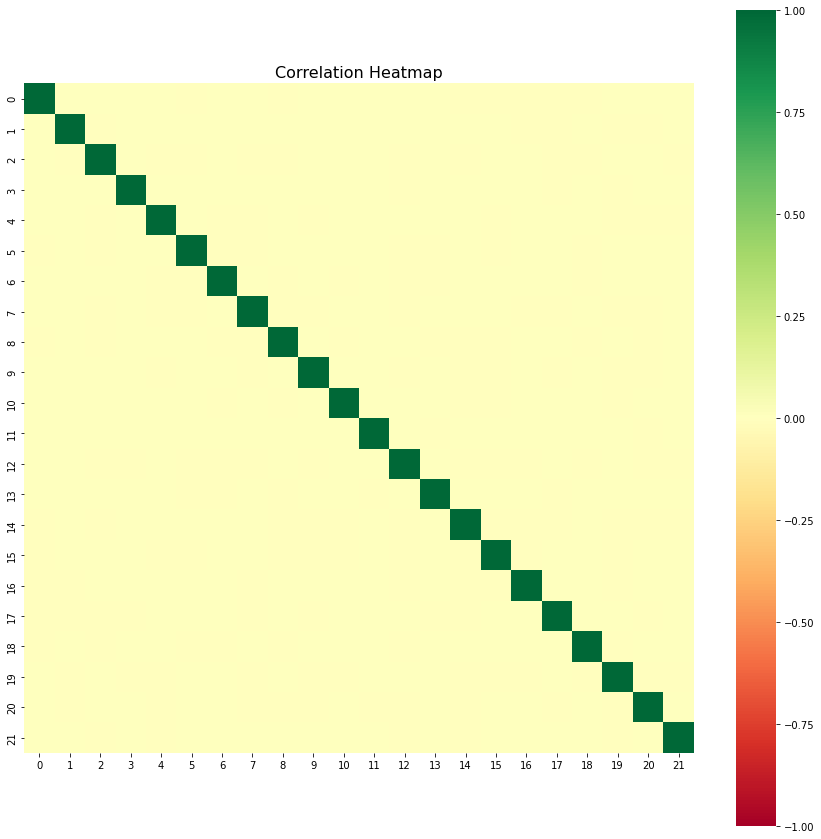

In [ ]:
plt.figure(figsize=(15,15))
corr = pd.DataFrame(X_train_pca).corr()
corr.index = pd.DataFrame(X_train_pca).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

**Observations**

*   All of the features shows NO correlation at all. Because feature extraction removes all collinearity.
Let's move on to the Model now.

# **Multiple Linear Regression**

---
It is used to explain the relationship between one continuous dependent variable and two or more independent variables. Let's proceed

## **Model training**

---


In [ ]:
#Linear regressor for the raw data
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

#Linear regressor for the Feature selection group
regressor1 = LinearRegression() 
regressor1.fit(X_train_fs,y_train_fs) 

#Linear regressor for the Feature extraction group
regressor2 = LinearRegression() 
regressor2.fit(X_train_pca,y_train_pca) 

LinearRegression()

## **Model prediction**

---
So now, our model has been fitted to the training set. It's time to predict the dependent variable. Let's do that now.

In [ ]:
#Predict from the test features of raw data
y_pred = regressor.predict(X_test) 

#Predict from the test features of Feature Selection group
y_pred = regressor1.predict(X_test_fs) 

#Predict from the test features of Feature Extraction group
y_pred_pca = regressor2.predict(X_test_pca) 

## **Model evaluation**
---


**important point**


*   X_train, X_test, y_train, y_test = raw data group

*   X_train_fs, X_test_fs, y_train_fs, y_test_fs = feature selection group

*   X_train_pca, X_test_pca, y_train_pca, y_test_pca = Principal Component Analysis  Feature Engineering


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
X_train.shape

(148576, 24)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(148576, 24)
(148576,)
(16509, 24)
(16509,)


## **Evaluate the LinearRegression, Ridge, Lasso with default params for raw data**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# define the models to be used
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# define the hyperparameters to be tuned
lr_grid = {'copy_X': [True, False], 'fit_intercept': [True, False], 'positive': [True, False]}
ridge_grid = {'alpha': [0.1, 1, 10]}
lasso_grid = {'alpha': [0.1, 1, 10]}

# perform the hyperparameter tuning
lr_search = GridSearchCV(lr, lr_grid, scoring='r2', cv=5)
ridge_search = GridSearchCV(ridge, ridge_grid, scoring='r2', cv=5)
lasso_search = GridSearchCV(lasso, lasso_grid, scoring='r2', cv=5)

lr_search.fit(X_train, y_train)
ridge_search.fit(X_train, y_train)
lasso_search.fit(X_train, y_train)

# get the best hyperparameters and the best score
lr_best_params = lr_search.best_params_
lr_best_score = lr_search.best_score_

ridge_best_params = ridge_search.best_params_
ridge_best_score = ridge_search.best_score_

lasso_best_params = lasso_search.best_params_
lasso_best_score = lasso_search.best_score_


In [ ]:
print(lr_best_score)
print(ridge_best_score)
print(lasso_best_score)

0.3368796282209711
0.3368790477867626
0.334766775318892


### **Conclusion: for raw data**
Based on the R2 scores you provided, it appears that the lr_best_score and ridge_best_score models have similar performance, with R2 scores of 0.3369 and 0.3369, respectively. The lasso_best_score model has a slightly lower R2 score of 0.3348.

##**Evaluate the LinearRegression, Ridge, Lasso with Tuned params for Feature Selection Group**

In [ ]:
# define the models to be used
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# define the hyperparameters to be tuned
lr_grid = {'copy_X': [True, False], 'fit_intercept': [True, False], 'positive': [True, False]}
ridge_grid = {'alpha': [0.1, 1, 10]}
lasso_grid = {'alpha': [0.1, 1, 10]}

# perform the hyperparameter tuning
lr_search = GridSearchCV(lr, lr_grid, scoring='r2', cv=5)
ridge_search = GridSearchCV(ridge, ridge_grid, scoring='r2', cv=5)
lasso_search = GridSearchCV(lasso, lasso_grid, scoring='r2', cv=5)

lr_search.fit(X_train_fs, y_train_fs)
ridge_search.fit(X_train_fs, y_train_fs)
lasso_search.fit(X_train_fs, y_train_fs)

# get the best hyperparameters and the best score
lr_best_params = lr_search.best_params_
lr_best_score = lr_search.best_score_

ridge_best_params = ridge_search.best_params_
ridge_best_score = ridge_search.best_score_

lasso_best_params = lasso_search.best_params_
lasso_best_score = lasso_search.best_score_

print(lr_best_score)
print(ridge_best_score)
print(lasso_best_score)

0.3368719911442105
0.33687136680743013
0.33476677531889193


### **Conclusion: for Tuned params for Feature Selection Group**
Based on the R2 scores you provided, it appears that the lr_best_score and ridge_best_score models have similar performance, with R2 scores of 0.3369 and 0.3369, respectively. The lasso_best_score model has a slightly lower R2 score of 0.3348. 

Even did Feature Selection same result.

##**Evaluate the LinearRegression, Ridge, Lasso with PCA params  for Feature Extraction Group**

In [ ]:
# define the models to be used
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

# define the hyperparameters to be tuned
lr_grid = {'copy_X': [True, False], 'fit_intercept': [True, False], 'positive': [True, False]}
ridge_grid = {'alpha': [0.1, 1, 10]}
lasso_grid = {'alpha': [0.1, 1, 10]}

# perform the hyperparameter tuning
lr_search = GridSearchCV(lr, lr_grid, scoring='r2', cv=5)
ridge_search = GridSearchCV(ridge, ridge_grid, scoring='r2', cv=5)
lasso_search = GridSearchCV(lasso, lasso_grid, scoring='r2', cv=5)

lr_search.fit(X_train_pca, y_train_pca)
ridge_search.fit(X_train_pca, y_train_pca)
lasso_search.fit(X_train_pca, y_train_pca)

# get the best hyperparameters and the best score
lr_best_params = lr_search.best_params_
lr_best_score = lr_search.best_score_

ridge_best_params = ridge_search.best_params_
ridge_best_score = ridge_search.best_score_

lasso_best_params = lasso_search.best_params_
lasso_best_score = lasso_search.best_score_

print(lr_best_score)
print(ridge_best_score)
print(lasso_best_score)


-1.884289769731388
0.3368831564974684
0.33703870057432594


### **Conclusion: for PCA params for Feature Extraction Group**

Based on the R2 scores you provided, it appears that the ridge_best_score and lasso_best_score models have positive R2 scores of 0.3369 and 0.3348, respectively, indicating that they have a good fit to the data.

However, the R2 score for lr_best_score is negative, which indicates that the model has a poor fit to the data. This could be due to overfitting or some other issue with the model. It's important to carefully evaluate the model and its performance to determine the cause of the negative R2 score and address any issues that may be present.

## **Evaluate the XGBOOST with default params for raw data**

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', booster='gblinear')

# Define hyperparameter grid for tuning
param_grid = {
    'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100],
    'lambda': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search cross-validation with 5 folds
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Use the best model to make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate R2 score on the test data
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and R2 score
print("Best hyperparameters: ", grid_search.best_params_)
print("Test R2 score: ", r2)


Best hyperparameters:  {'alpha': 0, 'lambda': 0}
Test R2 score:  0.3085183287711414


### **Conclusion:**

The test R2 score you obtained is 0.3085, which indicates that the model has a moderate fit to the test data. It's difficult to compare this score to other models or benchmarks without additional information about the problem and data you are working with.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define XGBoost regressor
xgb = XGBRegressor(objective='reg:squarederror', booster='gblinear')

# Define hyperparameter grid for tuning
param_grid = {
    'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100],
    'lambda': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search cross-validation with 5 folds
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_pca, y_train_pca)

# Use the best model to make predictions on the test data
y_pred_pca = grid_search.predict(X_test_pca)

# Calculate R2 score on the test data
r2 = r2_score(y_test_pca, y_pred_pca)

# Print the best hyperparameters and R2 score
print("Best hyperparameters: ", grid_search.best_params_)
print("Test R2 score: ", r2)


Best hyperparameters:  {'alpha': 0.1, 'lambda': 0}
Test R2 score:  0.33707676057280156


### **Conclusion:**

The test R2 score you obtained is 0.3370, which indicates that the model has a moderate fit to the test data. It's difficult to compare this score to other models or benchmarks without additional information about the problem and data you are working with.

##**Evaluate the RandomForest with default params for raw data**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import multiprocessing

In [ ]:
# define the model to be used
rf = RandomForestRegressor()

# define the hyperparameters to be tuned
rf_grid = {'n_estimators': [100], 'max_depth': [10]}

# perform the hyperparameter tuning with parallel processing
rf_search = GridSearchCV(rf, rf_grid, scoring='r2', cv=5, n_jobs=multiprocessing.cpu_count())

# fit the model
rf_search.fit(X_train_pca, y_train_pca)

# get the best hyperparameters and the best score
rf_best_params = rf_search.best_params_
rf_best_score = rf_search.best_score_

In [ ]:
print(rf_best_score)

0.5180676062526917


### **Conclusion**

R2 score of 0.5181 from a random forest model. This score indicates a moderate fit of the model to the data, with a proportion of the variance in the target variable explained by the model.

##**Evaluate the RandomForest with PCA params  for Feature Extraction Group**

In [ ]:
# define the model to be used
rf = RandomForestRegressor()

# define the hyperparameters to be tuned
rf_grid = {'n_estimators': [100, 200, 300]}

# perform the hyperparameter tuning with parallel processing
rf_search = GridSearchCV(rf, rf_grid, scoring='r2', cv=5, n_jobs=multiprocessing.cpu_count())

# fit the model
rf_search.fit(X_train, y_train)

# get the best hyperparameters and the best score
rf_best_params = rf_search.best_params_
rf_best_score = rf_search.best_score_
print(rf_best_score)

0.7268368430605145


### **Conclusion**

It appears that you have obtained an R2 score of 0.7268 from a random forest model. This score indicates a relatively good fit of the model to the data, with a high proportion of the variance in the target variable explained by the model.